In [2]:
import pandas as pd
import folium
import copernicusmarine
from pprint import pprint

In [3]:
copernicusmarine.get(
    dataset_id="cmems_obs-ins_glo_phybgcwav_mynrt_na_irr",
    index_parts=True,
    username = 'ldrouineau',
    password = 'xxxxxx',
)

INFO - 2025-04-25T13:21:24Z - Selected dataset version: "202311"
INFO - 2025-04-25T13:21:24Z - Selected dataset part: "latest"
INFO - 2025-04-25T13:21:24Z - Listing files on remote server...
1it [00:00,  6.64it/s]


ResponseGet(files=[FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history.txt', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history.txt', file_size=26.1719913482666, last_modified_datetime='2025-04-25T12:18:40.302000+00:00', etag='"65bb2bea15578800bdbe83fdd815c766-4"', file_format='.txt', output_directory=PosixPath('.'), filename='index_history_(4).txt', file_path=PosixPath('INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history_(4).txt'), file_status='DOWNLOADED'), FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_latest.txt', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmem

In [4]:
# Specify the path to the index file of your choice

file_path = "INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history.txt"
#file_path = "INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_monthly.txt"
#file_path = "INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_latest.txt"
#file_path = "INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_platform.txt"

# Read the file
instac_all = pd.read_csv(file_path, sep=',' , skiprows=5)

In [5]:
print(str(len(instac_all)) + " is the number of platforms in the [" + file_path + "] IN SITU prod: " )

85722 is the number of platforms in the [INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_history.txt] IN SITU prod: 


In [6]:
#index_platform.txt
ifile_path = "INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_platform.txt"
# Read the file
instac_platforms = pd.read_csv(file_path, sep=',' , skiprows=5)

In [7]:
print(str(len(instac_platforms)) + " is the number of platforms in the [" + ifile_path + "] IN SITU prod: ")

85722 is the number of platforms in the [INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/index_platform.txt] IN SITU prod: 


In [8]:
# Convert 'time_coverage_end' to datetime objects
instac_all['time_coverage_start'] = pd.to_datetime(instac_all['time_coverage_start'])
instac_all['time_coverage_end'] = pd.to_datetime(instac_all['time_coverage_end'])
instac_all['date_update'] = pd.to_datetime(instac_all['date_update'])

# Extract filename without path and extension
instac_all['platformcode'] = instac_all['file_name'].str.split('/').str[-1].str[:-3]
instac_all['platformcode'] = instac_all['platformcode'].str.split('_').str[-1]

In [9]:
instac_all.head()

,# product_id,file_name,geospatial_lat_min,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,institution,date_update,data_mode,parameters,platformcode
0,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,37.83000,80.58200,-13.007,41.33300,1980-11-26 00:00:00+00:00,2016-08-05 05:06:51+00:00,Institute of Marine Research,2024-06-20 11:28:33+00:00,M,BATH PRES TEMP ALKYZZXX CO2AQXXX-MLM3 NTRA PHO...,58AA
1,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,60.96450,79.13000,-18.551,46.68900,2003-07-26 21:39:00+00:00,2019-09-07 10:03:15+00:00,Institute of Marine Research,2024-06-20 11:28:30+00:00,M,BATH PRES TEMP ALKYZZXX CO2AQXXX-MLM3 NTRA PHO...,58GS
2,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,70.83385,82.10954,4.347,34.26045,2012-08-08 21:49:00+00:00,2018-09-29 09:56:40+00:00,University of Tromsø,2024-06-20 11:28:28+00:00,M,BATH PRES TEMP NTRA PHOS NTRI CPHL PSAL SLCA P...,58HJ
3,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,58.85000,71.28000,-38.200,33.97000,1923-04-13 00:00:00+00:00,1931-09-23 00:00:00+00:00,Institute of Marine Research,2024-06-20 11:29:00+00:00,M,PRES TEMP NTRA PHOS PSAL ACIDZZXX SLCA DOX1,58J1
4,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,2.15000,80.73300,-57.530,52.50000,1958-04-28 16:00:00+00:00,1982-11-06 06:25:48+00:00,Institute of Marine Research,2024-06-20 11:29:02+00:00,M,PRES NTRA PHOS TEMP SLCA DOX1 PSAL,58J2


In [10]:
# Create a subset with unique 'platformcode' values
unique_instac_platforms = instac_all.drop_duplicates(subset=['platformcode'])
print(str(len(unique_instac_platforms)) + " is the number of unique-name plaftorms")

80599 is the number of unique-name plaftorms


In [11]:
#make the first MAPplot

map_points = unique_instac_platforms

In [11]:
mapV = folium.Map([44, 13],
                  tiles="cartodbpositron",
                  zoom_start=3,
                  zoom_control=True,
                  scrollWheelZoom=False,
                  dragging=True)

In [12]:
for x in map_points.index:
  lat = map_points.loc[x, 'geospatial_lat_min']
  lon = map_points.loc[x, 'geospatial_lon_min']

  pid = (str(map_points.loc[x, 'file_name']) + '\n ')

  tooltip = f"{pid}, {lat} {lon}"  # Create a tooltip

  marker = folium.CircleMarker(
    [lat, lon],
    radius=2,
    fill=True,
    #color = str(colors[plat]),
    color = "red",
    #color = str(colors[colore]),
    tooltip=tooltip).add_to(mapV)

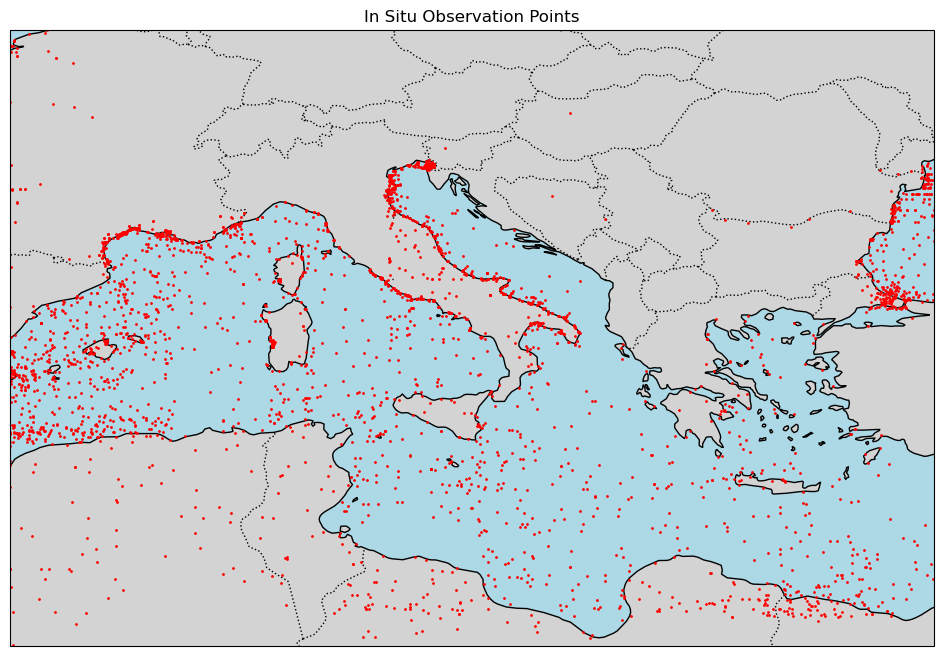

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map with PlateCarree projection
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
#ax.set_global()
ax.set_extent([0, 30, 30, 50], crs=ccrs.PlateCarree())  # Western Med area
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot each point
for x in map_points.index:
    lat = map_points.loc[x, 'geospatial_lat_min']
    lon = map_points.loc[x, 'geospatial_lon_min']
    pid = str(map_points.loc[x, 'file_name'])
    
    ax.plot(lon, lat, marker='o', color='red', markersize=1, transform=ccrs.PlateCarree())
    #ax.text(lon + 0.5, lat + 0.5, pid, fontsize=6, transform=ccrs.PlateCarree())

plt.title("In Situ Observation Points")
plt.show()

In [14]:
#we are not considering CTD yet!

csv_url = 'https://data-erddap.emodnet-physics.eu/erddap/tabledap/EP_PLATFORMS_METADATA_V2.csv?'
csv_url = csv_url + 'PLATFORMCODE'
csv_url = csv_url + '%2Ccall_name'
csv_url = csv_url + '%2Clatitude'
csv_url = csv_url + '%2Clongitude'
csv_url = csv_url + '%2Cdatafeaturetype'
csv_url = csv_url + '%2Cfirstdateobservation'
csv_url = csv_url + '%2Clastdateobservation'

csv_url = csv_url + '%2Cp33_watertemperature'
csv_url = csv_url + '%2Cp33_currents'
csv_url = csv_url + '%2Cp33_optical'
csv_url = csv_url + '%2Cp33_river'
csv_url = csv_url + '%2Cp33_sealevel'
csv_url = csv_url + '%2Cp33_waves'
csv_url = csv_url + '%2Cp33_winds'
csv_url = csv_url + '%2Cp33_biochemical'
csv_url = csv_url + '%2Cp33_carbonsystem'
csv_url = csv_url + '%2Cp33_dissolvedoxygen'
csv_url = csv_url + '%2Cp33_seaice'
csv_url = csv_url + '%2Cp33_underwatersound'
csv_url = csv_url + '%2Cp33_watersalinity'
csv_url = csv_url + '%2Cp33_meteorological'

csv_url = csv_url + '%2Cdataownername'
csv_url = csv_url + '%2Cdataownercountryname'
csv_url = csv_url + '%2Cdataassemblycenter'

csv_url = csv_url + '%2Cplatformtypecode'
csv_url = csv_url + '%2Cplatformtypedescription'
csv_url = csv_url + '%2Cintegrator_id'
csv_url = csv_url + '%2Cingestion'
csv_url = csv_url + '%2Cofficial_repository'
csv_url = csv_url + '%2Ccreationdate'
csv_url = csv_url + '%2Cupdatedate'
csv_url = csv_url + '%2Cdatafiles'
csv_url = csv_url + '%2Cintegrator'
csv_url = csv_url + '%2Cavailabledates'

In [15]:
#NEW STATIONS
try:
    emodnet_points = pd.read_csv(csv_url, skiprows=[1])
    print("Successfully loaded data")
    print(len(emodnet_points))
except Exception as e:
    print("Error loading data:", e)
    print("csv_url:", emodnet_points)

Successfully loaded data
102385


In [16]:
print(str(len(emodnet_points)) + " is the number of plaftorms in EMODnet")

102385 is the number of plaftorms in EMODnet


In [17]:
# Convert the 'firstdateobservation', 'lastdateobservation', 'creationdate', and 'updatedate' columns to datetime objects
emodnet_points['lastdateobservation'] = pd.to_datetime(emodnet_points['lastdateobservation'])
emodnet_points['creationdate'] = pd.to_datetime(emodnet_points['creationdate'])
emodnet_points['updatedate'] = pd.to_datetime(emodnet_points['updatedate'])

emodnet_points['firstdateobservation'] = pd.to_datetime(emodnet_points['firstdateobservation'], errors='coerce')

In [18]:
# this is to have a date (some are missing)
emodnet_points['firstdateobservation'] = emodnet_points['firstdateobservation'].fillna(emodnet_points['lastdateobservation'])

In [19]:
# Subset new_points where platformcode is unique
unique_emodnet_points = emodnet_points.drop_duplicates(subset=['PLATFORMCODE'])

In [20]:
#make the MAP plot for the EMODnet unique-name platforms
#
#MAKE LIST OF PLATFORMS AND MAP COLORS
emod_platform_types = list(emodnet_points['platformtypedescription'].unique())
#emod_platform_types

In [21]:
from random import randint
colors = []

for i in range(len (emod_platform_types)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [25]:
mapEM = folium.Map([44, 13],
                  tiles="cartodbpositron",
                  zoom_start=3,
                  zoom_control=True,
                  scrollWheelZoom=False,
                  dragging=True)

for x in unique_emodnet_points.index:
  lat = unique_emodnet_points.loc[x, 'latitude']
  lon = unique_emodnet_points.loc[x, 'longitude']

  pid = (str(unique_emodnet_points.loc[x, 'PLATFORMCODE']) + '\n ' + unique_emodnet_points.loc[x, 'platformtypedescription']+ 'n' + str(unique_emodnet_points.loc[x, 'firstdateobservation'])+ '\n ' + str(unique_emodnet_points.loc[x, 'lastdateobservation']))

  tooltip = f"{pid}, {lat} {lon}"  # Create a tooltip

  a_platform_type = unique_emodnet_points.loc[x, 'platformtypedescription']
  if a_platform_type in emod_platform_types:
    colore =  emod_platform_types.index(a_platform_type)
  else:
    colore =  "blue"

  marker = folium.CircleMarker(
    [lat, lon],
    radius=1,
    fill=True,
    #color = "blue",
    color = str(colors[colore]),
    tooltip=tooltip).add_to(mapEM)


/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/srv/conda/envs/notebook/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


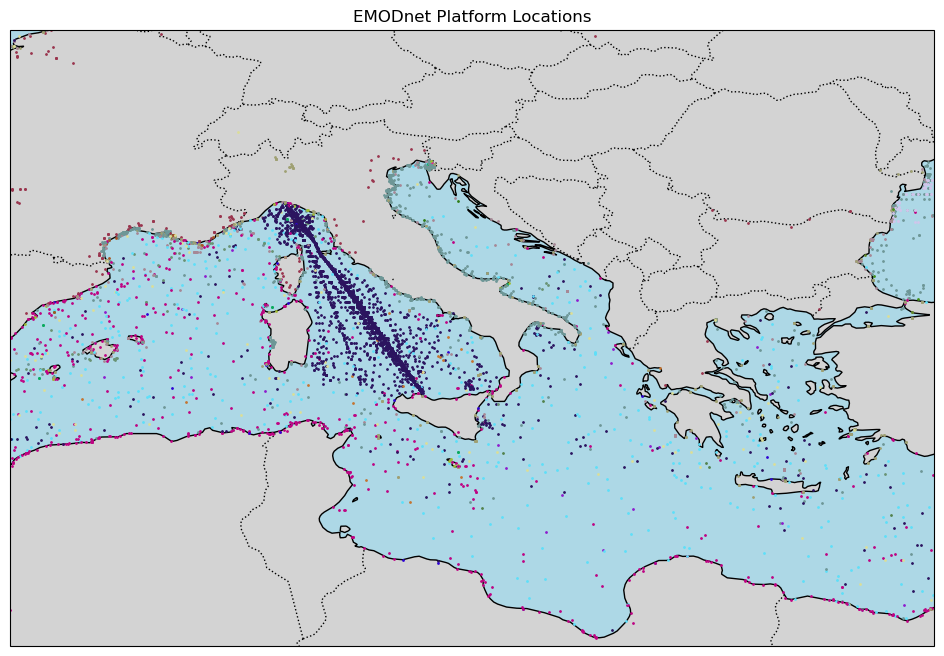

In [22]:
# Create a map centered roughly on the same region
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([0, 30, 30, 50], crs=ccrs.PlateCarree())  # Western Med area
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot points
for x in unique_emodnet_points.index:
    lat = unique_emodnet_points.loc[x, 'latitude']
    lon = unique_emodnet_points.loc[x, 'longitude']
    
    pid = str(unique_emodnet_points.loc[x, 'PLATFORMCODE'])
    platform_type = unique_emodnet_points.loc[x, 'platformtypedescription']
    first_date = unique_emodnet_points.loc[x, 'firstdateobservation']
    last_date = unique_emodnet_points.loc[x, 'lastdateobservation']
    
    label = f"{pid}\n{platform_type}\n{first_date} - {last_date}"

    # Determine color
    a_platform_type = platform_type
    if a_platform_type in emod_platform_types:
        colore = colors[emod_platform_types.index(a_platform_type)]
    else:
        colore = "blue"

    ax.plot(lon, lat, marker='o', color=colore, markersize=1, transform=ccrs.PlateCarree())
    #ax.text(lon + 0.2, lat + 0.2, pid, fontsize=5, transform=ccrs.PlateCarree())

plt.title("EMODnet Platform Locations")
plt.show()

In [27]:
# prompt: compare and subset in a new dataframe the platfrom (platform code) that are not both in unique_new_points and in unique_platforms_df

# Find platform codes present in unique_new_points but not in unique_platforms_df
platforms_only_in_new_points = unique_emodnet_points[~unique_emodnet_points['PLATFORMCODE'].isin(unique_instac_platforms['platformcode'])]

# Find platform codes present in unique_platforms_df but not in unique_new_points
platforms_only_in_old_points = unique_instac_platforms[~unique_instac_platforms['platformcode'].isin(unique_emodnet_points['PLATFORMCODE'])]

# Concatenate the two DataFrames to get all platforms that are not in both
platforms_not_in_both = pd.concat([platforms_only_in_new_points, platforms_only_in_old_points])

#save
platforms_not_in_both.to_csv('platforms_not_in_both.csv', index=False)

# Display the new DataFrame
print(str(len(platforms_not_in_both)) + " is the number of platforms that are not in both")

platforms_not_in_both

55091 is the number of platforms that are not in both


,PLATFORMCODE,call_name,latitude,longitude,datafeaturetype,firstdateobservation,lastdateobservation,p33_watertemperature,p33_currents,p33_optical,...,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,institution,date_update,data_mode,parameters,platformcode
3,cp_379-20241120T1605,cp_379-20241120T1605,36.051066,-74.739272,profile,2025-02-23 07:26:32+00:00,2025-02-23 07:26:32+00:00,1.0,1.0,1.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
8,300534065210580,300534065210580,-76.574470,-40.339750,timeseries,2025-02-04 10:00:00+00:00,2025-02-23 11:30:00+00:00,1.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
19,15430900,RS_BR_UHE_SAMUEL_RIO_BRANCO,-9.886700,-62.984700,timeseries,2024-03-13 03:00:00+00:00,2025-02-24 02:00:00+00:00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
26,20250224_002601,20250224_002601,-40.175222,174.364238,profile,2025-02-23 23:26:17+00:00,2025-02-24 00:26:01+00:00,1.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
28,EXOC0158,EXOC0158,51.350000,-56.670000,profile,1923-09-07 19:00:00+00:00,1923-09-07 19:00:00+00:00,1.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85322,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,56.69794,8.23128,8.23128,1996-06-26 08:00:00+00:00,1998-03-20 11:00:00+00:00,Danish Coastal Authority- Ministry of Transpor...,2025-04-01 09:52:05+00:00,R,DEPH VTPK VHZA VTM02 VH110 VGHS VZMX VTZM VTM1...,ThyborOenKanal-2103
85323,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,56.68177,8.13289,8.13289,1995-04-11 14:00:00+00:00,1996-03-08 05:00:00+00:00,Danish Coastal Authority- Ministry of Transpor...,2025-04-01 11:36:24+00:00,R,DEPH VTPK VHZA VTM02 VH110 VGHS VZMX VTZM VTM10,ThyborOenSW-2063
85328,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,56.61448,8.05272,8.05272,1991-10-10 12:45:00+00:00,1991-11-01 05:00:00+00:00,Danish Coastal Authority- Ministry of Transpor...,2025-04-01 14:48:27+00:00,R,DEPH VT110 VAVT VHZA VTM02 VH110 VAVH VZMX VTZ...,Vrist-2011
85539,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,...,50.76983,-0.49215,-0.49215,2008-08-01 00:00:00+00:00,2024-02-09 09:40:00+00:00,Channel Coastal Observatory;National Network o...,2025-04-02 13:43:32+00:00,M,DEPH SLEV,ArunPlatformTG


In [28]:
# if latitude in platforms_not_in_both is NaN and geospatial_lat_min is NaN drop the line, else if geospatial_lat_min is not NaN then latitude = geospatial_lat_max
# Iterate through the rows of the DataFrame
for index, row in platforms_not_in_both.iterrows():
    if pd.isna(row['latitude']) and pd.isna(row['geospatial_lat_min']):
        # Drop the row if both 'latitude' and 'geospatial_lat_min' are NaN
        platforms_not_in_both.drop(index, inplace=True)
    elif not pd.isna(row['geospatial_lat_min']):
        # Update 'latitude' with 'geospatial_lat_max' if 'geospatial_lat_min' is not NaN
        platforms_not_in_both.loc[index, 'latitude'] = row['geospatial_lat_min']


In [29]:
# same for lon
for index, row in platforms_not_in_both.iterrows():
    if pd.isna(row['longitude']) and pd.isna(row['geospatial_lon_min']):
        # Drop the row if both 'latitude' and 'geospatial_lat_min' are NaN
        platforms_not_in_both.drop(index, inplace=True)
    elif not pd.isna(row['geospatial_lon_min']):
        # Update 'latitude' with 'geospatial_lat_max' if 'geospatial_lat_min' is not NaN
        platforms_not_in_both.loc[index, 'longitude'] = row['geospatial_lon_min']

In [30]:
# same for name
for index, row in platforms_not_in_both.iterrows():
    if pd.isna(row['PLATFORMCODE']) and pd.isna(row['platformcode']):
        # Drop the row if both 'latitude' and 'geospatial_lat_min' are NaN
        platforms_not_in_both.drop(index, inplace=True)
    elif not pd.isna(row['platformcode']):
        # Update 'latitude' with 'geospatial_lat_max' if 'geospatial_lat_min' is not NaN
        platforms_not_in_both.loc[index, 'PLATFORMCODE'] = row['platformcode']


In [31]:
platforms_not_in_both

,PLATFORMCODE,call_name,latitude,longitude,datafeaturetype,firstdateobservation,lastdateobservation,p33_watertemperature,p33_currents,p33_optical,...,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,institution,date_update,data_mode,parameters,platformcode
3,cp_379-20241120T1605,cp_379-20241120T1605,36.051066,-74.739272,profile,2025-02-23 07:26:32+00:00,2025-02-23 07:26:32+00:00,1.0,1.0,1.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
8,3YAR,300534065210580,58.840500,4.714600,timeseries,2025-02-04 10:00:00+00:00,2025-02-23 11:30:00+00:00,1.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
19,58HG,RS_BR_UHE_SAMUEL_RIO_BRANCO,58.369720,1.755040,timeseries,2024-03-13 03:00:00+00:00,2025-02-24 02:00:00+00:00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
26,58MJ,20250224_002601,80.342000,21.368000,profile,2025-02-23 23:26:17+00:00,2025-02-24 00:26:01+00:00,1.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
28,EXOC0158,EXOC0158,51.350000,-56.670000,profile,1923-09-07 19:00:00+00:00,1923-09-07 19:00:00+00:00,1.0,0.0,0.0,...,NaN,NaN,NaN,NaT,NaT,NaN,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85323,ThyborOenSW-2063,NaN,56.681770,8.132890,NaN,NaT,NaT,NaN,NaN,NaN,...,56.68177,8.13289,8.13289,1995-04-11 14:00:00+00:00,1996-03-08 05:00:00+00:00,Danish Coastal Authority- Ministry of Transpor...,2025-04-01 11:36:24+00:00,R,DEPH VTPK VHZA VTM02 VH110 VGHS VZMX VTZM VTM10,ThyborOenSW-2063
85328,Vrist-2011,NaN,56.614480,8.052720,NaN,NaT,NaT,NaN,NaN,NaN,...,56.61448,8.05272,8.05272,1991-10-10 12:45:00+00:00,1991-11-01 05:00:00+00:00,Danish Coastal Authority- Ministry of Transpor...,2025-04-01 14:48:27+00:00,R,DEPH VT110 VAVT VHZA VTM02 VH110 VAVH VZMX VTZ...,Vrist-2011
85539,ArunPlatformTG,NaN,50.769830,-0.492150,NaN,NaT,NaT,NaN,NaN,NaN,...,50.76983,-0.49215,-0.49215,2008-08-01 00:00:00+00:00,2024-02-09 09:40:00+00:00,Channel Coastal Observatory;National Network o...,2025-04-02 13:43:32+00:00,M,DEPH SLEV,ArunPlatformTG
85684,TeignbridgePierTG,NaN,50.543880,-3.492130,NaN,NaT,NaT,NaN,NaN,NaN,...,50.54388,-3.49213,-3.49213,2008-07-04 14:50:00+00:00,2014-02-03 08:20:00+00:00,South West Coastal Monitoring;National Network...,2025-04-02 13:43:33+00:00,D,DEPH SLEV,TeignbridgePierTG


In [32]:
emodnet_moooring_df = unique_emodnet_points[unique_emodnet_points['platformtypedescription'] == 'Mooring']
len(emodnet_moooring_df)

3651

In [33]:
instac_moorings_df = unique_instac_platforms[unique_instac_platforms.iloc[:, 1].str.contains("_TS_MO", na=False)]
len(instac_moorings_df)

2953

In [34]:
unique_instac_platforms.head()

,# product_id,file_name,geospatial_lat_min,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,institution,date_update,data_mode,parameters,platformcode
0,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,37.83000,80.58200,-13.007,41.33300,1980-11-26 00:00:00+00:00,2016-08-05 05:06:51+00:00,Institute of Marine Research,2024-06-20 11:28:33+00:00,M,BATH PRES TEMP ALKYZZXX CO2AQXXX-MLM3 NTRA PHO...,58AA
1,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,60.96450,79.13000,-18.551,46.68900,2003-07-26 21:39:00+00:00,2019-09-07 10:03:15+00:00,Institute of Marine Research,2024-06-20 11:28:30+00:00,M,BATH PRES TEMP ALKYZZXX CO2AQXXX-MLM3 NTRA PHO...,58GS
2,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,70.83385,82.10954,4.347,34.26045,2012-08-08 21:49:00+00:00,2018-09-29 09:56:40+00:00,University of Tromsø,2024-06-20 11:28:28+00:00,M,BATH PRES TEMP NTRA PHOS NTRI CPHL PSAL SLCA P...,58HJ
3,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,58.85000,71.28000,-38.200,33.97000,1923-04-13 00:00:00+00:00,1931-09-23 00:00:00+00:00,Institute of Marine Research,2024-06-20 11:29:00+00:00,M,PRES TEMP NTRA PHOS PSAL ACIDZZXX SLCA DOX1,58J1
4,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,2.15000,80.73300,-57.530,52.50000,1958-04-28 16:00:00+00:00,1982-11-06 06:25:48+00:00,Institute of Marine Research,2024-06-20 11:29:02+00:00,M,PRES NTRA PHOS TEMP SLCA DOX1 PSAL,58J2


In [35]:
instac_moorings_df.head()

,# product_id,file_name,geospatial_lat_min,geospatial_lat_max,geospatial_lon_min,geospatial_lon_max,time_coverage_start,time_coverage_end,institution,date_update,data_mode,parameters,platformcode
203,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,62.42470,62.42830,6.0422,6.04900,2022-03-01 00:00:00+00:00,2024-04-02 07:59:00+00:00,The Norwegian Public Roads Administration,2024-11-29 12:56:54+00:00,R,DEPH VPSP PSAL GTZAMAZ2 GZMXZZ01 VTPK WDIR VGH...,A-Sulafjorden
204,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,70.57577,70.57665,-127.6607,-127.66030,2017-08-06 07:00:00+00:00,2020-01-11 10:31:41+00:00,Fisheries and Oceans Canada,2024-11-29 12:05:33+00:00,M,BATH DEPH SVEL TEMP FLU2 TUR4 PSAL DOX1 DOXY C...,AmundsenGulf-AT1
205,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,70.68108,70.68122,-126.8718,-126.87133,2017-08-06 12:00:00+00:00,2020-09-20 00:45:01+00:00,Fisheries and Oceans Canada,2024-11-29 12:05:35+00:00,M,BATH DEPH SIGT DENS PSAL TEMP CNDC,AmundsenGulf-AT2
206,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,70.04060,70.20092,-126.3067,-123.15783,2018-10-02 22:30:01+00:00,2020-05-06 17:01:40+00:00,Fisheries and Oceans Canada,2024-11-29 12:05:33+00:00,M,BATH DEPH SIGT DOX1 PSAL TEMP CNDC,AmundsenGulf-AT3
207,COP-AR-01,INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cm...,70.39358,70.39360,-124.5401,-123.45951,2018-10-02 18:15:02+00:00,2020-09-18 09:35:51+00:00,Fisheries and Oceans Canada,2024-11-29 12:56:03+00:00,R,BATH DEPH CNDC PSAL TEMP DOX2 SIGT TUR4 SVEL,AmundsenGulf-WC


In [36]:
# Analysis of the subsets

emodnet_gl_df = unique_emodnet_points[unique_emodnet_points['platformtypedescription'] == 'Gliders']
print(len(emodnet_gl_df))

instac_gl_df = unique_instac_platforms[unique_instac_platforms.iloc[:, 1].str.contains("_PR_GL", na=False)]
print(len(instac_gl_df))

2742
585


In [37]:
# prompt: make a list of the dataownername from unique_emodnet_points and the list of the institution from unique_instac_platforms

dataowner_names = unique_emodnet_points['dataownername'].unique().tolist()
institution_names = unique_instac_platforms['institution'].unique().tolist() # Assuming 'institution' is the column name

In [38]:
dataowner_names #in EMODnet

['UNKNOWN',
 'U.S. INTEGRATED OCEAN OBSERVING SYSTEM',
 'MARINE INSTITUTE',
 'SCRIPPS INSTITUTION OF OCEANOGRAPHY',
 'MET OFFICE EXETER',
 'NATIONAL WATER AGENCY OF BRAZIL',
 'SWEDISH METEOROLOGICAL AND HYDROLOGICAL INSTITUTE',
 'UNIVERSITY OF WASHINGTON',
 'METEOROLOGICAL SERVICE OF NEW ZEALAND LTD',
 'NATIONAL OCEANIC AND ATMOSPHERIC ADMINISTRATION, PACIFIC MARINE ENVIRONMENTAL LABORATORY',
 'BUREAU OF METEOROLOGY MELBOURNE',
 'MET OFFICE, EXETER',
 'FISHERIES AND OCEANS CANADA',
 'TEXAS A&M UNIVERSITY',
 'INDIAN NATIONAL CENTRE FOR OCEAN INFORMATION SERVICES',
 'AUGAS DE GALICIA XUNTA DE GALICIA',
 'ALL-RUSSIA RESEARCH INSTITUTE OF HYDROMETEOROLOGICAL INFORMATION WORLD DATA CENTRE NATIONAL OCEANOGRAPHIC DATA CENTRE (NODC)',
 'INSTITUTO NACIONAL DEL AGUA (INA)',
 'METEO FRANCE',
 'NATIONAL OCEANIC AND ATMOSPHERIC ADMINISTRATION PACIFIC MARINE ENVIRONMENTAL LABORATORY',
 'ERIC EURO-ARGO',
 'COMMONWEALTH SCIENTIFIC AND INDUSTRIAL RESEARCH ORGANISATION',
 'NATIONAL WEATHER SERVICE, NATI

In [39]:
institution_names #in insitu

['Institute of Marine Research',
 'University of Tromsø',
 'Norwegian Polar Institute',
 'Norwegian Mapping Authority',
 'The Norwegian Coastal Administration',
 'Institute of Oceanology Polish Academy of Sciences',
 'Arctic and Antarctic Research Institute',
 'The University Centre in Svalbard',
 'Woods Hole Oceanographic Institution',
 'Swedish Maritime Administration',
 'University of Bergen',
 'Norwegian Institute for Water Research',
 'The Norwegian Public Roads Administration',
 'Fisheries and Oceans Canada',
 'University of Washington - School of Oceanography',
 'Lyse AS',
 'Marine and Freshwater Research Institute',
 'Equinor Energy AS',
 'Icelandic Road and Coastal Administration',
 'SMHI',
 'DMU',
 'BSH',
 'EPA',
 'IOPAN',
 'LHEI',
 'MSI',
 'SYKE',
 'FMI',
 'GEOMETOC',
 'SMA',
 'UU',
 'IOPAS',
 'FCOO',
 'DMI',
 'IMWM',
 'LEGMC',
 'MIG',
 'RUMS',
 'NWAHEM',
 'UkrSCEC',
 'Marine Hydrophysical Institute RAS',
 'National Institute for Marine Research and Development (Romania)',
 

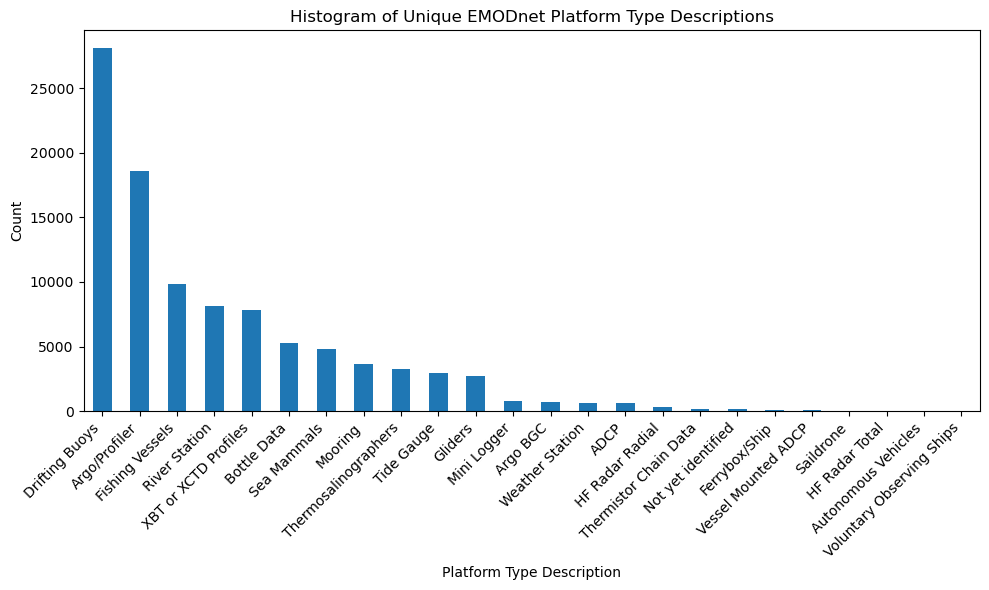

In [40]:
# prompt: make an histogram counting unique_emodnet_points['platformtypedescription'] per 'platformtypedescription'

import matplotlib.pyplot as plt

# Assuming unique_emodnet_points is already defined as in your provided code.

platform_type_counts = unique_emodnet_points['platformtypedescription'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
platform_type_counts.plot(kind='bar')
plt.title('Histogram of Unique EMODnet Platform Type Descriptions')
plt.xlabel('Platform Type Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()